In [94]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

#Power-Law (Gamma) Transformation

In [95]:
img = Image.open('/content/Cameraman.bmp')

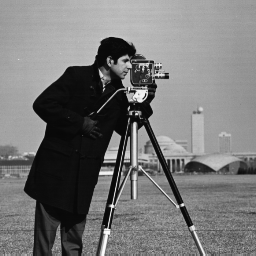

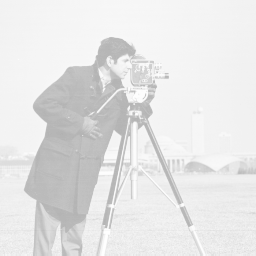

In [96]:
#原始圖片
display(img)

#Gamma圖片
gamma = 0.1
np_img = np.array(img) 
gamma_img = np.array(255*(np_img / 255) ** gamma, dtype = 'uint8') 
display(Image.fromarray(gamma_img))

#Histogram Qualization

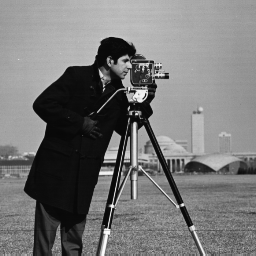

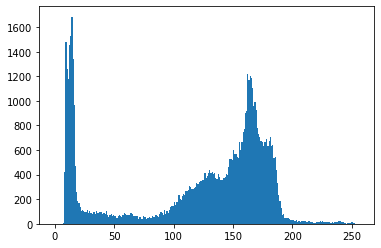

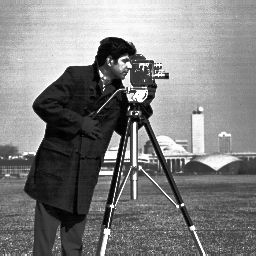

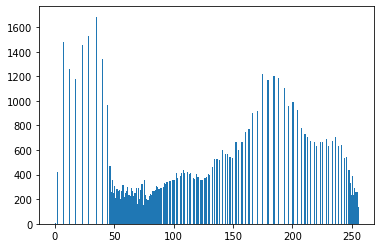

In [97]:
#原始圖片
display(img)
plt.hist(np.array(img).ravel(), 256, [0, 256])
plt.show()

#Histogram Qualization圖片
HQ_img = np.array(img)
rows, cols = HQ_img.shape
H = np.zeros(256, int)
Hc = np.zeros(256, int)
T = np.zeros(256, int)

for i in range(rows):
  for j in range(cols):
    H[HQ_img[i][j]] = H[HQ_img[i][j]] + 1
g_min = np.nonzero(H)[0][0]
for i in range(1, 256):
  Hc[i] = Hc[i - 1] + H[i]
H_min = Hc[g_min]

try:
  for i in range(256):
    T[i] = round(((Hc[i] - H_min) * 255) / ((cols * rows) - H_min))
except:
  print("計算錯誤", "分母為0")

for i in range(rows):
  for j in range(cols):
    HQ_img[i][j] = T[HQ_img[i][j]]

HQ_img = Image.fromarray(HQ_img)
display(Image.open('HQ.png'))
plt.hist(np.array(HQ_img).ravel(), 256, [0, 256])
plt.show()

#Laplacian opearator

In [105]:
def laplacian(dx, dy, w):
    """ Calculate the laplacian of the array w=[] """
    laplacian_xy = np.zeros(w.shape)
    for y in range(w.shape[1]-1):
        laplacian_xy[:, y] = (1/dy)**2 * ( w[:, y+1] - 2*w[:, y] + w[:, y-1] )
    for x in range(w.shape[0]-1):
        laplacian_xy[x, :] = laplacian_xy[x, :] + (1/dx)**2 * ( w[x+1,:] - 2*w[x,:] + w[x-1,:] )
    return laplacian_xy

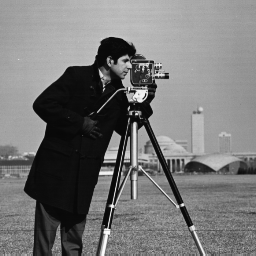

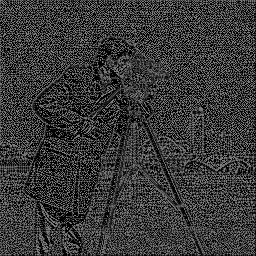

In [108]:
#原始圖片
display(img)

#Laplacian opearator圖片
laplacian_img = laplacian(2, 2, np_img)
display(Image.fromarray(laplacian_img).convert('L'))